In [174]:
season_to_title = {1: "Book 1: Air", 2: "Book 2: Spirits", 3: "Book 3: Change", 4: "Book 4: Balance"}


In [1]:
def extract_imdb_episode_name_and_rating(season_log, num_eps):
    i = 0
    episode_to_rating_and_name = {}
    end_index_episode = season_log.find('Reverse the order')
    while (i < num_eps):
        episodeInfo = []
        start_index_episode = season_log.find('title="', end_index_episode+1)
        end_index_episode = season_log.find('"', start_index_episode+7)
        st_ind_rating = season_log.find('ipl-rating-star__rating', end_index_episode)
        en_ind_rating = season_log.find('</span>', st_ind_rating)
        if (i % 2 == 0):
            episode_name = season_log[start_index_episode+7:end_index_episode]
            rating = float(season_log[st_ind_rating+25:en_ind_rating])
            
            episode_name = episode_name.replace('\\', '')
            episodeInfo.append(episode_name)
            episodeInfo.append(rating)
            episode_to_rating_and_name[int((i+2)/2)] = episodeInfo
            
        i = i + 1
    return episode_to_rating_and_name
    

    

In [2]:
season_one = "https://www.imdb.com/title/tt1695360/episodes?season=1&ref_=ttep_ep_sn_nx"
season_two = "https://www.imdb.com/title/tt1695360/episodes?season=2&ref_=ttep_ep_sn_nx"
season_three = "https://www.imdb.com/title/tt1695360/episodes?season=3&ref_=ttep_ep_sn_nx"
season_four = "https://www.imdb.com/title/tt1695360/episodes?season=4&ref_=ttep_ep_sn_nx"

In [3]:
import urllib3


http = urllib3.PoolManager()

In [4]:
imdb = http.request('GET', season_one)
imdb_data_1 = imdb.data
string_rep_1 = str(imdb_data_1)
s1_dict = extract_imdb_episode_name_and_rating(string_rep_1, 24)

#--------------------------------------------
imdb = http.request('GET', season_two)
imdb_data_2 = imdb.data
string_rep_2 = str(imdb_data_2)
s2_dict = extract_imdb_episode_name_and_rating(string_rep_2, 28)

#--------------------------------------------
imdb = http.request('GET', season_three)
imdb_data_3 = imdb.data
string_rep_3 = str(imdb_data_3)
s3_dict = extract_imdb_episode_name_and_rating(string_rep_3, 26)

#--------------------------------------------
imdb = http.request('GET', season_four)
imdb_data_4 = imdb.data
string_rep_4 = str(imdb_data_4)
s4_dict = extract_imdb_episode_name_and_rating(string_rep_4, 26)

seasons_dict_list = [s1_dict, s2_dict, s3_dict, s4_dict]

In [5]:
def obtain_episode_name(s, e):
    if (s == 1):
        season_dictionary = seasons_dict_list[0]
    elif (s == 2):
        season_dictionary = seasons_dict_list[1]
    elif (s == 3):
        season_dictionary = seasons_dict_list[2]
    else:
        season_dictionary = seasons_dict_list[3]
    episode_name = season_dictionary[e][0]
    return episode_name

In [6]:
def catchAlias(char):
    if (char == "Young General"):
        return "Iroh"
    elif (char == "Young Lin" or char == "Chief Beifong"):
        return "Lin"
    elif (char == "Young Korra" or char == "Avatar Korra"):
        return "Korra"
    elif (char == "Young Su"):
        return "Su"
    elif (char == "Noatak"):
        return "Amon"
    elif (char == "Hiroshi Sato"):
        return "Hiroshi"
    elif (char == "Prince Wu"):
        return "Wu"
    elif (char == "P'li"):
        return "P'Li"
    elif (char == "Unavaatu"):
        return "Unalaq"
    elif (char == "Baatar"):
        return "Baatar Sr."
    else:
        return char

In [7]:
from matplotlib import pyplot
import matplotlib.pyplot as matplt
from bs4 import BeautifulSoup

In [8]:
import urllib3


http = urllib3.PoolManager()

url = 'http://korra.avatarspirit.net/transcripts.php?num=106'

resp = http.request('GET', url)
bs = BeautifulSoup(resp.data, 'html.parser')
tags = bs.find_all('b')

In [9]:
from collections import Counter

In [10]:
start = False 
skip = False
c = Counter()
for tag in tags:
    text = tag.get_text()
    if (start and ("Act" not in text)): 
        c[text] += 1
    elif (text == "Act I"):
        start = True
print(c)
        
    

Counter({'Korra:': 27, 'Tenzin:': 25, 'Lin:': 19, 'Bolin:': 16, 'Mako:': 15, 'Radio Broadcaster:': 10, 'Tarrlok:': 9, 'Amon:': 7, 'Tahno:': 7, 'Ring Announcer:': 5, 'Referee:': 3, 'Radio Host:': 2, 'Lieutenant:': 1, 'Metalbender Cop:': 1})


In [11]:
def getGender(character):
    female = ["Korra", "P'Li", "Shaman", "Fire Nation Councilwoman", "Ming-Hua", "Katara", "Senna",
             "Kya", "Eska", "Ahnah", "Female Bandit", "Su", "Kuvira", "Lin", "Radio Operator", "Female Pilot", 
              "Jinora", "Ikki", "Opal", "Raava", "May", "Dark Spider Spirit", "Asami", "Pema", 
              "Shop Woman", "Queen Hou-Ting", "Nonbender Woman", "Prosecutor", "Elderly Air Acolyte", "Woman", 
             "Air Acolyte woman", "Zhu Li", "Ginger", "Buttercup", "Female Reporter #1", "Female Reporter #2", 
              "Wife", "Little Girl", "Ryu's Mom", "Aunt","Yin", "Female New Airbender #1", "Vendor", "Girl 1", 
             "Girl 2", "Elderly Woman", "Tuyen", "Radio Operator"]
    unknown = ["Kind Spirit #1", "Kind Spirit #2", "Light Spirit"]
    if (character in female):
        return "Female"
    elif (character in unknown):
        return "Indeterminate Gender"
    return "Male"

In [12]:
genderListTest = ["Noatak", "Kind Spirit #1", "Korra", "Mako", "P'li", "Uncle Iroh", "Tenzin", "Senna", "Avatar Korra", "Ming-Hua", "Young Lin", "Asami", "Bumi"]
expectation = ["Male", "Indeterminate Gender", "Female","Male", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male"]




In [13]:
def testGetGender(cList, eResults):
    score = 0
    for c in range(0, len(cList)):
        if (getGender(catchAlias(cList[c])) == eResults[c]):
            score = score + 1
        else: 
            print("ERROR: " + cList[c] + " is not a " + getGender(catchAlias(cList[c])) + "Character." )
    print (str((score * 100)/len(eResults)) + "% ")

In [14]:
testGetGender(genderListTest, expectation)

100.0% 


In [15]:
def getMoralAffiliation(character):
    villain = ["P'Li", "Zolt", "Two Toed Ping", "Chow", "Little Chou", "Big Chou", "Zhao", "Ming-Hua", "Lieutenant",
               "Evil Unalaq", "Northern Soldier #1", "Northern Soldier #2", "Yakone", "Young Unalaq", "Shady Shin", 
              "Viper", "Waterbending Thug","Unavaatu", "Ghazan", "Dai Li Agent", "Guard #1", "Guard #2", 
                    "Guard #3", "Head Soldier", "Guard Post Soldier", "Bathroom Attendant", 
               "Bison Rustler", "Bison Rustler Leader", "Dai Li Sergeant", "Kuvira", 
               "Earthbending Thug", "Head Soldier", "Zaheer", "Dark Spider Spirit"]
    reformed = ["Tarrlok", "Hiroshi Sato", "Eska", "Desna", "Varrick", "Baatar Jr"]
    if (character in villain):
        return "Villain"
    elif (character in reformed):
        return "Reformed"
    else: 
        return "Hero"

In [16]:

#Maps the character to the appropriate bending 
#W = Water, E = Earth, F = Fire, Ai = Air, Av = Avatar, N = Nonbender/Unknown, S = Spirit

def typeOfBender(character):
    avatar = ["Korra", "Aang", "Wan", "Young Korra"]
    fireBenders = ["P'Li", "Acupuncturist", "Mako", "Zolt", "Two Toed Ping", "Huntsman",
                   "Iroh", "Lord Zuko", "White Lotus Guard #1", "Zhao", "Uncle Iroh", "Zuko", 
                   "Young General", "Karu", "White Lotus guard", "Firebending Master",
                   "Baraz", "Shaman", "Jaya", "Fire Nation Councilwoman"]
    waterBenders = ["Ming-Hua", "Katara", "Evil Unalaq", "Evil Unalaq", "Tonraq", "Senna", "Tarrlok", 
                    "Amon", "Yakone", "Rebel Leader", "Southern Waterbender #2",
                    "Northern Soldier", "Northern Soldier #1", "Northern Soldier #2", 
                    "Southern Waterbender #1", "Young Unalaq", "Shady Shin", 
                    "Viper", "Hasook", "Kya", "Tahno", "Unalaq", "Eska", "Waterbending Thug",
                   "Desna", "Ahnah", "Unavaatu"]
    earthBenders = ["Ghazan", "Bandit Leader", "Dai Li Agent", "Guard #1", "Guard #2", 
                    "Guard #3", "Head Soldier", "Guard Post Soldier", "Bathroom Attendant", 
                    "Female Bandit", "Male Bandit","Sheriff", "Police Radio",  
                    "Bolin", "Lin", "Saikhan", "Cop", "Police Officer",
                    "Su", "Bison Rustler", "Bison Rustler Leader", "Dai Li Sergeant", "Wing","Wei","Huan",
                    "Kuvira", "Toza", "Earthbending Thug", "Aiwei", "Skoochy", "Tu", "Hong Li", "Soldier #1", "Police Clerk #1", "Police Clerk #2",
                    "Soldier #2", "Head Soldier", "Metalbender Cop"]
    airBenders = ["Zaheer", "Female New Airbender #1", "Yung", "New Airbender #1", 
                  "New Airbender #2", "New Airbender #3 & #4", 
                  "Kuon", "Male Nomad", "Otaku", "Daw", "Bumi", "Tenzin's Kids",
                  "Kai", "Jinora", "Tenzin", "Meelo",
                 "Ikki", "Opal", "Ryu"]
    spirits = ["Raava", "Vaatu", "Spirit Frog", "Spirit Aye-Aye", 
               "Kind Spirit #1", "Kind Spirit #2", "Random Spirit #1", 
               "Spirit Mushroom", "Fruithog", "May", "Spirit Flower Bulb", "Jim",
               "Wan Shi Tong", "Spirit One",
              "Random Spirit #2", "Fire Lion Turtle", "Dark Spider Spirit"]
    if (character in avatar):
        return "Av"
    elif (character in waterBenders):
        return "W"
    elif (character in earthBenders):
        return "E"
    elif (character in fireBenders):
        return "F"
    elif (character in airBenders):
        return "Ai"
    elif (character in spirits):
        return "S"
    else: 
        return "N"
    
    

In [17]:
characters = ["Asami", "Korra", "Baraz", "Ahnah", "Ryu", 
              "Lin", "Su", "Kuvira", "Varrick", "Zhu Li", 
              "Mako", "Bolin", "Zaheer", "Hou Ting", "Ming-Hua", 
              "P'li", "Wan Shi Tong", "Jim", "Pema", "Raava"]
exp = ["N", "Av", "F", "W", "Ai", 
     "E", "E", "E", "N", "N", 
     "F", "E", "Ai", "N", "W", 
       "F", "S", "S", "N", "S"]

In [18]:
characterList = ["Noatak", "Korra", "Mako", "P'li", "Uncle Iroh", "Tenzin", "Senna", "Avatar Korra", "Ming-Hua", "Young Lin"]
expectedResults = ["Amon", "Korra", "Mako", "P'Li", "Uncle Iroh", "Tenzin", "Senna", "Korra", "Ming-Hua", "Lin"]

In [19]:
def testCatchAlias(cList, eResults):
    score = 0
    for c in range(0, len(cList)):
        if (catchAlias(cList[c]) == eResults[c]):
            score = score + 1
        else: 
            print("ERROR: " + cList[c] + " actually goes by " + eResults[c] + " instead of " + catchAlias(cList[c]) + "." )
    print (str((score * 100)/len(eResults)) + "% ")
    

In [20]:
def testTypeOfBender(charList, expected):
    score = 0
    for c in range(0, len(charList)):
        if (typeOfBender(catchAlias(charList[c])) == expected[c]):
            score = score + 1
        else: 
            print("ERROR: " + charList[c] + " is a(n) " + expected[c] + " marked as a(n) " + typeOfBender(charList[c]) + "." )
    print (str((score * 100)/len(expected)) + "% ")
    

In [21]:
testCatchAlias(characterList, expectedResults)

100.0% 


In [22]:
testTypeOfBender(characters, exp)

100.0% 


In [23]:
import re

In [24]:
#map s/e combo to episode number
def get_episode_num(season, episode):
    epNum = -1
    if (season == 1):
        epNum = episode
    elif (season == 2):
        epNum = 12 + episode
    elif (season == 3): 
        epNum = 26 + episode
    elif (season == 4):
        epNum = 39 + episode
    return epNum
    

In [25]:
#Find the number of lines spoken by each character 

counterList = []
bendingCounterList = []
genderCounterList = []
wordsSpoken = []
dialogue_bending_order_show = []
season_to_ep = {1: 12, 2: 14, 3: 13, 4: 13}
for j in range(1,5):
    numEps = season_to_ep[j]
    for i in range(1, numEps+1):
        epString = 'http://korra.avatarspirit.net/transcripts.php?num='
        epString = epString + str(j)
        val = str(i)
        if (i < 10):
            val = "0" + val
        epString = epString + val
        resp = http.request('GET', epString)
        bs = BeautifulSoup(resp.data, 'html.parser')
        tags = bs.find_all('b')
        lines = bs.find_all('i')
        start = False 
        skip = False
        
        #Find out how many lines each character has
        c = Counter()
        bending_count = Counter()
        gender_count = Counter()
        moral_affiliation = Counter()
        bendingHeatMapData = []
        for tag in tags:
            text = tag.get_text()
            if (start and ("Act" not in text)): 
                charName = text[0:len(text)-1]
                charName = charName.replace("\\'", "'")
                trueName = catchAlias(charName)
                c[trueName] += 1
                #trueName = catchAlias(text[0:len(text)-1])
                benderType = typeOfBender(trueName)
                bendingHeatMapData.append(benderType)
                bending_count[benderType] += 1
                gender = getGender(trueName)
                moralAff = getMoralAffiliation(trueName)
                moral_affiliation[moralAff] += 1
                gender_count[gender] += 1
            elif (text == "Act I"):
                start = True
        counterList.append(c)
        dialogue_bending_order_show.append(bendingHeatMapData)
        bendingCounterList.append(bending_count)
        genderCounterList.append(gender_count)
    

In [26]:
import math

In [27]:
def findClosestSquare(num):
    print("NUMBER: ", num)
    return math.ceil(pow(num, 1/2))

In [28]:
def bending_heat_map_by_episode(season, episode):
    index = get_episode_num(season, episode)
    dialogue_bending_data = dialogue_bending_order_show[index-1]
    square_dim = findClosestSquare(len(dialogue_bending_data))
    print(square_dim)

In [29]:
bending_heat_map_by_episode(1,2)

NUMBER:  200
15


In [30]:
ep_season_input = [[1,2], [2,3], [4,2], [2,12], [2,14], [3,6], [3,13], [4,1]]
ep_season_expected_output = [2, 15, 41, 24, 26, 32, 39, 40]

In [31]:
def test_get_episode_num(cList, eResults):
    score = 0
    for c in range(0, len(cList)):
        actual = get_episode_num(cList[c][0], cList[c][1])
        if (actual == eResults[c]):
            score = score + 1
        else: 
            print("ERROR: expected episode number: " + str(eResults[c]) + " got " + str(actual))
    print (str((score * 100)/len(eResults)) + "% ")

In [32]:
test_get_episode_num(ep_season_input, ep_season_expected_output)

100.0% 


In [33]:
import math
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

In [34]:
# Make this into a pie graph or something better in d3.js
def get_percentage_lines_spoken_by_bending_type_per_episode(season, episode): 
    total_lines = 0
    episode_number = get_episode_num(season, episode)
    episode_name = obtain_episode_name(season, episode)
    values = ["N", "Av", "Ai", "S", "F", "W", "E"]
    #indexing starts at 0
    abb_to_rep = {"N": "Nonbenders", "Av": "Avatar(s)", "Ai": "Airbenders",
              "S": "Spirits", "F": "Firebenders", "W": "Waterbenders", 
              "E": "Earthbenders"}
    episode_data = bendingCounterList[episode_number-1]
    item_rep = episode_data.items()
    item_rep = sorted(item_rep, key=lambda x: x[1], reverse=True)
    x = []
    y = []
    color_map = {"N": 'tan', "Av": 'silver', 
                  "Ai": 'yellow', "S": 'pink', 
                  "F": 'red', "W": 'blue', 
                  "E":'green'}
    color_list = []
    for i in range(0, len(item_rep)):
        total_lines = total_lines + item_rep[i][1]
    for i in range(0, len(item_rep)):
        full_form_bender = abb_to_rep[item_rep[i][0]]
        color = color_map[item_rep[i][0]]
        percentage = (item_rep[i][1] * 100)/total_lines
        if (percentage != 0):
            percentage = round_half_up(percentage, 1)
            x.append(full_form_bender)
            y.append(percentage)
            color_list.append(color)
    matplt.pie(y, labels=x, autopct= '%1.1f%%', colors=color_list)
    matplt.title("Lines Spoken By Bending Demographics for " + "Season " + str(season) + ", Episode "
                 + str(episode) + ": " + obtain_episode_name(season, episode))

In [35]:
#Full Show Report
def get_full_show_report_percentage_lines_spoken_by_bending():
    print("~~~~~~~~~~~~~~~~~~~~~~ SEASON ONE ~~~~~~~~~~~~~~~~~~~~~~")
    for i in range(1, 13):
        get_percentage_lines_spoken_by_bending_type_per_episode(1, i)
    print("~~~~~~~~~~~~~~~~~~~~~~ SEASON TWO ~~~~~~~~~~~~~~~~~~~~~~")
    for i in range(1, 15):
        get_percentage_lines_spoken_by_bending_type_per_episode(2, i)
    print("~~~~~~~~~~~~~~~~~~~~~~ SEASON THREE ~~~~~~~~~~~~~~~~~~~~~~")
    for i in range(1, 14):
        get_percentage_lines_spoken_by_bending_type_per_episode(3, i)
    print("~~~~~~~~~~~~~~~~~~~~~~ SEASON FOUR ~~~~~~~~~~~~~~~~~~~~~~")
    for i in range(1, 14):
        get_percentage_lines_spoken_by_bending_type_per_episode(4, i)

def get_episode_report_percentage_lines_spoken_by_bending(s,e):
    get_percentage_lines_spoken_by_bending_type_per_episode(s, e)
    
    
        

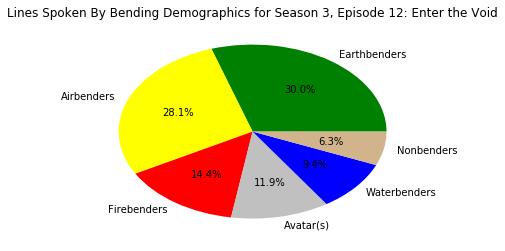

In [36]:
get_episode_report_percentage_lines_spoken_by_bending(3,12)

In [37]:
# Make this into a pie graph or something better in d3.js
def get_percentage_lines_spoken_by_gender_per_episode(season, episode): 
    total_lines = 0
    episode_number = get_episode_num(season, episode)
    episode_name = obtain_episode_name(season, episode)
    values = ["Males", "Females", "Characters of Indeterminate Gender"]
    #indexing starts at 0
    episode_data = genderCounterList[episode_number-1]
    item_rep = episode_data.items()
    item_rep = sorted(item_rep, key=lambda x: x[1], reverse=True)
    x = []
    y = []
    color_list = ['pink', 'cyan']
    for i in range(0, len(item_rep)):
        total_lines = total_lines + item_rep[i][1]
    for i in range(0, len(item_rep)):
        percentage = (item_rep[i][1] * 100)/total_lines
        if (percentage != 0):
            percentage = round_half_up(percentage, 1)
            x.append(item_rep[i][0])
            y.append(percentage)
    matplt.pie(y, labels=x, autopct= '%1.1f%%', colors=color_list)
    matplt.title(obtain_episode_name(season, episode))

In [38]:
#Full Show Report

def get_episode_report_percentage_lines_spoken_by_gender(s,e):
    get_percentage_lines_spoken_by_gender_per_episode(s, e)
    
def get_full_show_report_percentage_lines_spoken_by_gender():
    print("~~~~~~~~~~~~~~~~~~~~~~ SEASON ONE ~~~~~~~~~~~~~~~~~~~~~~")
    for i in range(1, 13):
        get_percentage_lines_spoken_by_gender_per_episode(1, i)
    print("~~~~~~~~~~~~~~~~~~~~~~ SEASON TWO ~~~~~~~~~~~~~~~~~~~~~~")
    for i in range(1, 15):
        get_percentage_lines_spoken_by_gender_per_episode(2, i)
    print("~~~~~~~~~~~~~~~~~~~~~~ SEASON THREE ~~~~~~~~~~~~~~~~~~~~~~")
    for i in range(1, 14):
        get_percentage_lines_spoken_by_gender_per_episode(3, i)
    print("~~~~~~~~~~~~~~~~~~~~~~ SEASON FOUR ~~~~~~~~~~~~~~~~~~~~~~")
    for i in range(1, 14):
        get_percentage_lines_spoken_by_gender_per_episode(4, i)



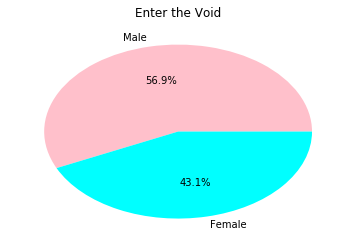

In [39]:
get_episode_report_percentage_lines_spoken_by_gender(3,12)

In [40]:
def plotCharacterFrequencyOverAll(character, show=False):
    frq = []
    #character = character + ":"
    character = catchAlias(character)
    for c in counterList:
        frq.append(c[character])
    rangeList = list(range(52))
    add_one = [x+1 for x in rangeList]
    if (show):
        pyplot.plot(add_one, frq)
        pyplot.xlabel("Episode #")
        pyplot.ylabel("Number Of Lines Spoken by " + character[0:len(character)-1])
        pyplot.show()
    return frq;
        

In [41]:
def plotCharacterFrequencyOverAllPerSeason(character, season):
    frq = []
    #character = character + ":"
    character = catchAlias(character)
    seasonList = []
    start = -1
    end = -1
    if (season == 1):
        start = 0 
        end = 12
    elif (season == 2):
        start = 12
        end = 26
    elif (season == 3):
        start = 26 
        end = 39
    elif (season == 4):
        start = 39 
        end = 52
    for i in range(start, end):
        seasonList.append(counterList[i])
    for s in seasonList:
        frq.append(s[character])
    return frq
    

In [42]:
plotCharacterFrequencyOverAll("Korra")

[57,
 66,
 52,
 40,
 45,
 27,
 34,
 49,
 9,
 16,
 34,
 25,
 38,
 40,
 46,
 47,
 40,
 3,
 7,
 4,
 33,
 44,
 12,
 25,
 8,
 32,
 48,
 39,
 21,
 33,
 42,
 14,
 6,
 26,
 42,
 30,
 30,
 19,
 5,
 4,
 63,
 20,
 22,
 16,
 12,
 44,
 33,
 53,
 7,
 30,
 13,
 30]

In [158]:
main_characters = ['Korra','Tenzin','Asami', 'Mako', 'Bolin']

In [44]:
!pip3 install plotly

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


In [45]:
#Frequency of character dialogue over time
import plotly.graph_objects as go

def character_dialogue_heatmap(charList):
    line_stats = []
    for i in range(0, len(main_characters)):
        line_stats.append(plotCharacterFrequencyOverAll(catchAlias(charList[i])))
    episodes_index = list(range(52))
    episode_names = []
    season_lengths = [12,14,13,13]
    for i in range(1,5):
        for j in range(season_lengths[i-1]):
            episode_names.append(obtain_episode_name(i, j+1))
    fig = go.Figure(data=go.Heatmap(
            z=line_stats,
            x=episode_names,
            y=charList,
            colorscale='Viridis'))

    fig.update_layout(
        title='Lines Spoken Per Episode',
        xaxis_nticks=15)

    fig.show()

In [159]:
character_dialogue_heatmap(main_characters)

In [177]:
def character_dialogue_heatmap_per_season(season, charList):
    line_stats = []
    for i in range(0, len(charList)):
        line_stats.append(plotCharacterFrequencyOverAllPerSeason(catchAlias(charList[i]), season))
    episode_names = []
    season_lengths = [12,14,13,13]
    episodes_index = list(range(season_lengths[season-1]))
    for j in range(season_lengths[season-1]):
        episode_names.append(obtain_episode_name(season, j+1))
    fig = go.Figure(data=go.Heatmap(
            z=line_stats,
            x=episode_names,
            y=charList,
            colorscale='Viridis'))

    fig.update_layout(
        title=season_to_title[season] + "- Number Of Lines Spoken",
        xaxis_nticks=180)

    fig.show()

In [178]:
character_dialogue_heatmap_per_season(1, ["Tenzin", "Toph", "Yakone", "Korra"])

In [49]:
def removeItalics(string):
    start = 0
    first = True
    noItalics = ""
    i = string.find('<i>(')
    j = string.find(')</i>')
    noItalics = string[0:i]
    if (string.find('<i>(', j+5) == -1):
        noItalics = noItalics + string[j+4:]
    while(string.find('<i>(', j+5) != -1):
        prev = j+5
        i = string.find('<i>(', j+5)
        noItalics = noItalics + " " + string[prev:i] 
        j = string.find(')</i>', i+4)
        if ((string.find('<i>(', j+5) == -1) or (j == -1)):
            noItalics = noItalics + string[j+5:]
            break
    return noItalics

In [50]:
def separateCharacterAndQuote(line):
    start = line.find('<b>')
    end = line.find('</b>')
    endQuote = line.find('\\r')
    if (endQuote == -1):
        endQuote = line.find('\r')
    character_name = line[start+3:end-1]
    quote = line[end+4:endQuote]
    #print("Character Name: " + character_name)
    quote = quote.replace("\\'", "'")
    quote = quote.replace("\\\'", "'")
    quote = quote.replace("\'", "'")
    quote = quote.replace("<i>", "")
    quote = quote.replace("</i>" , "")
    quote = quote.strip()
    character_name = character_name.replace("\\'", "'")
    return character_name, quote
    
    

In [51]:
qwot = "<b>Kya:</b> <i>There's no sign of her anywhere.</i>\\r"
character_name, quote = separateCharacterAndQuote(qwot)
print("character name: " + character_name)
print("quote: " + quote)

character name: Kya
quote: There's no sign of her anywhere.


In [52]:
separateCharacterAndQuote("<b>Korra:</b> Man, I got a good feeling about tonight. I don\'t care if we are the underdogs, we can take those pompous Wolfbats. \r<br>")

('Korra',
 "Man, I got a good feeling about tonight. I don't care if we are the underdogs, we can take those pompous Wolfbats.")

In [53]:
separateCharacterAndQuote("<b>Radio Host:</b> ...brought to you by Cabbage Corp. Republic City\'s trusted name in technology for over fifty years.\r<br>\r<br> \r<br>\r<br>")

('Radio Host',
 "...brought to you by Cabbage Corp. Republic City's trusted name in technology for over fifty years.")

In [54]:
import time


In [87]:
episode_quote_tracker = {}
lines = []
season_to_ep = {1: 12, 2: 14, 3: 13, 4: 13}
episode_num = 1
start_time = time.perf_counter()
#1. character
#2. quote 
#3. bending type
#4. gender
for season in range(1,5):
    numEps = season_to_ep[season]
    for episode in range(1, numEps+1):
        episode_quote_list = []
        epString = 'http://korra.avatarspirit.net/transcripts.php?num='
        epString = epString + str(season)
        val = str(episode)
        if (episode < 10):
            val = "0" + val
        epString = epString + val
        resp = http.request('GET', epString)
        no_italics = removeItalics(str(resp.data))
        length = len(no_italics)
        i = no_italics.find('Act I')
        bold = no_italics.find('<b>', i+4)
        print(epString)
        while (bold != -1):
            store = bold
            bold = no_italics.find('<b>', bold+3)
            line = no_italics[store:bold]
            character, quote = separateCharacterAndQuote(line)
            gender = getGender(catchAlias(character))
            element = typeOfBender(catchAlias(character))
            rating = seasons_dict_list[season-1][episode][1]
            episode_quote_list.append([character, quote, gender, element, rating])
        episode_quote_tracker[episode_num] = episode_quote_list
        episode_num += 1
end_time = time.perf_counter()
print("This process took: " + str((end_time - start_time)) + " seconds.")

http://korra.avatarspirit.net/transcripts.php?num=101
http://korra.avatarspirit.net/transcripts.php?num=102
http://korra.avatarspirit.net/transcripts.php?num=103
http://korra.avatarspirit.net/transcripts.php?num=104
http://korra.avatarspirit.net/transcripts.php?num=105
http://korra.avatarspirit.net/transcripts.php?num=106
http://korra.avatarspirit.net/transcripts.php?num=107
http://korra.avatarspirit.net/transcripts.php?num=108
http://korra.avatarspirit.net/transcripts.php?num=109
http://korra.avatarspirit.net/transcripts.php?num=110
http://korra.avatarspirit.net/transcripts.php?num=111
http://korra.avatarspirit.net/transcripts.php?num=112
http://korra.avatarspirit.net/transcripts.php?num=201
http://korra.avatarspirit.net/transcripts.php?num=202
http://korra.avatarspirit.net/transcripts.php?num=203
http://korra.avatarspirit.net/transcripts.php?num=204
http://korra.avatarspirit.net/transcripts.php?num=205
http://korra.avatarspirit.net/transcripts.php?num=206
http://korra.avatarspirit.ne

In [88]:
for episode in range(1, 13):
    print(seasons_dict_list[0][episode][1])
for episode in range(1, 15):
    print(seasons_dict_list[1][episode][1])
for episode in range(1, 14):
    print(seasons_dict_list[2][episode][1])
for episode in range(1, 14):
    print(seasons_dict_list[3][episode][1])

8.4
8.4
8.5
8.3
8.0
8.9
8.5
8.7
8.9
8.9
8.9
9.3
8.0
7.9
7.8
8.1
7.8
7.8
9.3
9.6
8.2
8.7
8.4
8.5
8.7
8.4
8.6
8.7
8.4
8.6
8.6
8.6
8.3
8.9
8.8
9.0
9.3
9.4
9.6
8.7
9.3
8.5
8.7
8.6
8.6
8.3
6.0
8.6
9.0
8.7
9.2
9.0


In [89]:
#What Visualizations Do We Want to Accomplish?

#What are the 10 most spoken by each character (n-gram) 1 <= n <= 3
#Percent of Lines spoken by each type of character per episode (heat map)
#How many lines does each character have per episode?
#Look up by phrase/line, see what characters speak that phrase the most?

#Viewership per episode (if obtainable)
#IMDB Rating per episode (over time for each season)

#Possible AI Things?
#Make a 




In [90]:
def removePunctuation(line):
    punctuation = [".", ",", "...", "!", "?"]
    for p in punctuation:
        line = line.replace(p, "")
    return line


In [91]:
#What are the 10 most and least common words spoken by each character
def getTopTenMostSpokenWords(characterName, filterUnwanted=True):
    word_count = Counter()
    exclude_words = ["i", "you're", "he'll", "i'll", "we'll", "it's", "we", "who", "what", "where", "when", "why", "how", "yes", "no", "on",
    "i'm", "not", "you", "me", "they", 
    "he", "she", "it", "my", "this", "that", "of", "at",
    "the", "is", "(", ")", "in", "be", "to", 
    "your", "has", "have", "under", "above", 
    "below", "a", "so","and", "but", "for", "nor", "yet", "or"]
    banWords = exclude_words if filterUnwanted else []
    for episode in range(1, len(episode_quote_tracker)+1):
        script = episode_quote_tracker[episode]
        for line in script:
            character = line[0] 
            character = catchAlias(character)
            if (characterName == character):
                quote = line[1]
                noPunctuation = removePunctuation(quote)
                listOfWords = noPunctuation.split(" ")
                for word in listOfWords:
                    if (word.lower() not in banWords and len(word) > 0):
                        word_count[word.lower()] += 1            
    mcw = word_count.most_common(10)
    x_list = []
    y_list = []
    for i in range(0, len(mcw)):
        x_list.append(mcw[i][0])
        y_list.append(mcw[i][1])
    matplt.bar(x_list, y_list)
    matplt.xticks(rotation=90)
    xLabel = characterName + "'s Most Common Words"
    appendix = "(no stop words)" if filterUnwanted else "";
    xLabelFinal = xLabel + appendix
    matplt.xlabel(xLabelFinal)
    matplt.ylabel("Frequency")
    matplt.show()
    

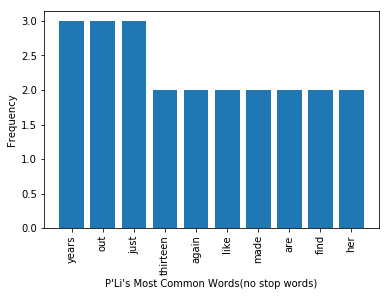

In [92]:
getTopTenMostSpokenWords("P'Li", True)

In [93]:
from collections import defaultdict

In [94]:
def getTopTenMostSpokenTwoGram(characterName):
    word_count = Counter()
    for episode in range(1, len(episode_quote_tracker)+1):
        script = episode_quote_tracker[episode]
        for line in script:
            character = line[0] 
            character = catchAlias(character)
            if (characterName == character):
                quote = line[1]
                noPunctuation = removePunctuation(quote)
                listOfWords = noPunctuation.split(" ")
                if (" " in listOfWords):
                    listOfWords.remove(" ")
                if ("" in listOfWords):
                    listOfWords.remove("")
                if ("(" in listOfWords):   
                    listOfWords.remove("(")
                if (")" in listOfWords):
                    listOfWords.remove(")")
                for i in range(0, len(listOfWords)-1):
                    prev = listOfWords[i].lower()
                    curr = listOfWords[i+1].lower()
                    two_gram = prev + " " + curr
                    if (len(prev) > 0 and len(curr) > 0):
                        word_count[two_gram] += 1
    mostCommonWords = word_count.most_common(10)
    x_list = []
    y_list = []
    for i in range(0, len(mostCommonWords)):
        x_list.append(mostCommonWords[i][0])
        y_list.append(mostCommonWords[i][1])
    matplt.bar(x_list, 
               y_list)
    matplt.xticks(rotation=90)
    matplt.xlabel("Most Common Two-Gram Phrases Spoken By " + characterName)
    matplt.ylabel("Frequency")
    matplt.show()

In [95]:
def get_top_ten_most_spoken_three_gram(characterName):
    word_count = Counter()
    for episode in range(1, len(episode_quote_tracker)+1):
        script = episode_quote_tracker[episode]
        for line in script:
            character = line[0] 
            character = catchAlias(character)
            if (characterName == character):
                quote = line[1]
                noPunctuation = removePunctuation(quote)
                listOfWords = noPunctuation.split(" ")
                if (" " in listOfWords):
                    listOfWords.remove(" ")
                if ("" in listOfWords):
                    listOfWords.remove("")
                if ("(" in listOfWords):   
                    listOfWords.remove("(")
                if (")" in listOfWords):
                    listOfWords.remove(")")
                for i in range(0, len(listOfWords)-2):
                    prev = listOfWords[i].lower()
                    curr = listOfWords[i+1].lower()
                    nxt = listOfWords[i+2].lower()
                    three_gram = prev + " " + curr + " " + nxt
                    if (len(prev) > 0 and len(curr) > 0):
                        word_count[three_gram] += 1
    mostCommonWords = word_count.most_common(10)
    x_list = []
    y_list = []
    for i in range(0, len(mostCommonWords)):
        x_list.append(mostCommonWords[i][0])
        y_list.append(mostCommonWords[i][1])
    matplt.bar(x_list, 
               y_list)
    matplt.xticks(rotation=90)
    matplt.xlabel("Most Common Three-Gram Phrases Spoken By " + characterName)
    matplt.ylabel("Frequency")
    matplt.show()

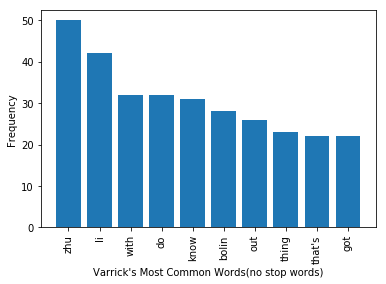

In [96]:
getTopTenMostSpokenWords("Varrick")

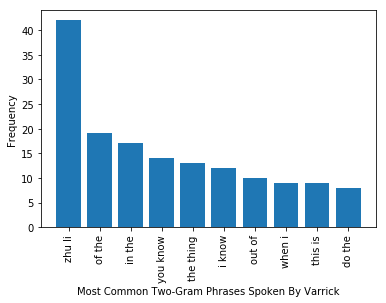

In [97]:
getTopTenMostSpokenTwoGram("Varrick")

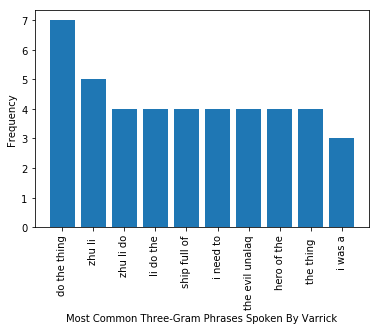

In [98]:
get_top_ten_most_spoken_three_gram("Varrick")

In [147]:
#How often is a phrase spoken in each episode?
def frequencyOfWordsByEpisode(phrase):
    frequency_counter = Counter()
    for episode in range(1, len(episode_quote_tracker)+1):
        script = episode_quote_tracker[episode]
        for line in script:
            quote = line[1]
            noPunctuation = removePunctuation(quote)
            listOfWords = noPunctuation.split(" ")
            for word in listOfWords:
                 if (word.lower() == phrase.lower()):
                    frequency_counter[episode] += 1
    x_list = []
    y_list = []
    for i in range(52):
        x_list.append(i)
        y_list.append(frequency_counter[i])
    pyplot.plot(x_list, y_list)
    pyplot.xlabel("Episode #")
    y_label = "Number Of Times " + "'" + phrase + "'" + " Is Spoken:"
    pyplot.ylabel(y_label)
    pyplot.show()
    #return frequency_counter

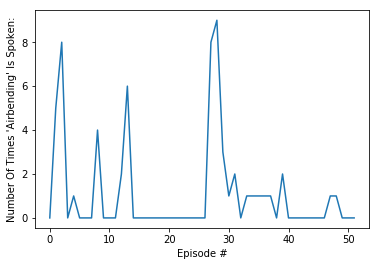

In [150]:
frequencyOfWordsByEpisode("Airbending")

In [101]:
# Test Punctuation
newLine = removePunctuation("I'm not oppressing anyone! You're... you're oppressing yourself.")
print(newLine)

I'm not oppressing anyone You're you're oppressing yourself


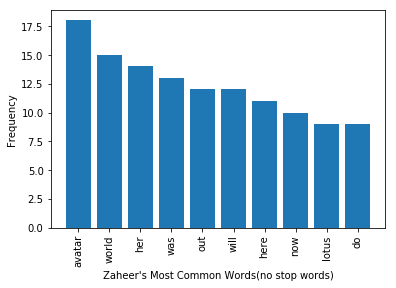

In [102]:
getTopTenMostSpokenWords("Zaheer", True)

In [103]:
def obtain_episode_quote_info(s, e):
    ep_num = get_episode_num(s, e)
    return episode_quote_tracker[ep_num]

In [104]:
#W = Water, E = Earth, F = Fire, Ai = Air, Av = Avatar, N = Nonbender/Unknown, S = Spirit
#Male, Female, Indeterminate Gender
def gender_and_element_map(g, e):
    elemental_map = {"W": 0, "E": 1, "F": 2, "Ai": 3, "Av": 4, 
                  "N": 5, "S": 6}
    gender_map = {"Male": 0, "Female": 1, "Indeterminate Gender": 2}
    return [gender_map[g], elemental_map[e]]
            
            

In [111]:
def heat_map_of_benders_by_episode(s, e, show_indeterminate=False):
    ep_name = obtain_episode_name(s, e)
    quote_data = obtain_episode_quote_info(s, e)
    x_labels = ["Waterbenders", "Earthbenders", "Firebenders", "Airbenders", "Avatar", "Non-Bender", "Spirit"]
    y_labels = ["Male", "Female", "Indeterminate"] if show_indeterminate else ["Male", "Female"]
    z_values = [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]] if show_indeterminate else [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
    for q in quote_data:
        [g_index, e_index] = gender_and_element_map(q[2], q[3])
        z_values[g_index][e_index] = z_values[g_index][e_index] + 1
    fig2 = go.Figure(data=go.Heatmap(
                   z=z_values,
                   x=x_labels,
                   y=y_labels,
                   hoverongaps = False))
    fig2.update_layout(
        title="Lines Spoken by Demographic for Book " + str(s) + " Episode " + str(e) + ": " + ep_name)
    fig2.show()
    
        
    
    
    

In [137]:
heat_map_of_benders_by_episode(1,6)

In [107]:
import altair as alt
import pandas as pd

def scatter_plot_of_word_by_character(character):
    df = pd.DataFrame(episode_quote_tracker[episode],columns=['Name','Quote','Gender', 'Element'])
    print(df.tail())
    



In [129]:
from wordcloud import WordCloud, STOPWORDS
import numpy
#import Image
from PIL import Image

#What are the 10 most and least common words spoken by each character
def generate_word_cloud(characterName):
    try:
        mask = numpy.array(Image.open("korra_picture.png"))
        large_word_string = ""
        for episode in range(1, len(episode_quote_tracker)+1):
            script = episode_quote_tracker[episode]
            for line in script:
                character = line[0] 
                character = catchAlias(character)
                if (characterName == character):
                    quote = line[1]
                    noPunctuation = removePunctuation(quote)
                    listOfWords = noPunctuation.split(" ")
                    for word in listOfWords:
                        if (len(word) > 0):
                            large_word_string = large_word_string + word + " "       
        stopwords = set(STOPWORDS)
        cloud = WordCloud(stopwords=stopwords, max_words = 100, background_color='white').generate(large_word_string)


        matplt.imshow(cloud)
        matplt.axis('off')
        matplt.show()
    except: 
        print("No Cloud for: " + "'" + characterName + "'. Please check your spelling")

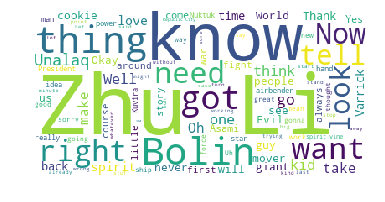

In [157]:
generate_word_cloud("Varrick")

In [135]:
#GOAL: Create a heat map visualization using the Avatar Map of where everything is by location:

In [136]:
harms_way = episode_quote_tracker[1][1]
print(len(episode_quote_tracker))
for i in range(0, len(episode_quote_tracker)):
    print("i: ", i)
    print(episode_quote_tracker[i+1][0])
    print("-------")


52
i:  0
['Tonraq', 'The White Lotus has honored my family by coming. Thank you.', 'Male', 'W', 8.4]
-------
i:  1
['Korra', '-and in the final round, the Buzzard Wasps won with a decisive knockout.   What do you say we go to the arena tonight, catch a few pro-bending matches?', 'Female', 'Av', 8.4]
-------
i:  2
['Korra', "What's the big idea with making me train this early in the morning? The morning is evil.", 'Female', 'Av', 8.5]
-------
i:  3
['Amon', 'After I take your bending away you will be nothing.', 'Male', 'W', 8.3]
-------
i:  4
['Mako', "It's been great having you in so many back to back practices Korra.", 'Male', 'F', 8.0]
-------
i:  5
['Radio Host', "You're listening to The Music Hour...", 'Male', 'N', 8.9]
-------
i:  6
['Mako', "I still don't believe they're shutting this place down.", 'Male', 'F', 8.5]
-------
i:  7
['Ikki', "You're finally here!   Welcome to Air Temple Island!   Your new home!", 'Female', 'Ai', 8.7]
-------
i:  8
['Korra', "What are you doing?   TA

In [183]:
#ratings over time based on season: 
#How often is a phrase spoken in each episode?
def ratingGraphBySeason(season):
    ssnLen = [12, 14, 13, 13]
    frequency_counter = Counter()
    season_information_dictionary = seasons_dict_list[season-1]
    length = ssnLen[season-1]
    x_list = []
    y_list = []
    for episode in range(1, length+1):
        e_name = season_information_dictionary[episode][0]
        e_rating = season_information_dictionary[episode][1]
        
        x_list.append(e_name)
        y_list.append(e_rating)
    pyplot.plot(x_list, y_list)
    pyplot.xlabel("Episode Title")
    y_label = "IMDB Rating"
    pyplot.ylabel(y_label)
    pyplot.title(season_to_title[season])
    pyplot.xticks(rotation=90)
    pyplot.show()
    

In [186]:
def allSeasonsRating(): 
    for i in range(1, 5):
        ratingGraphBySeason(i)

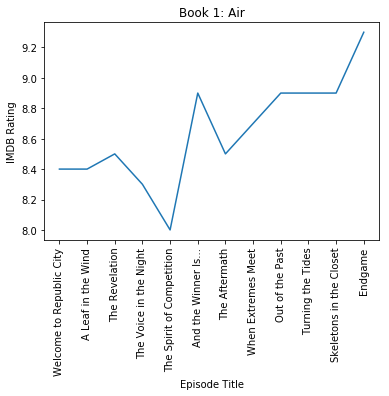

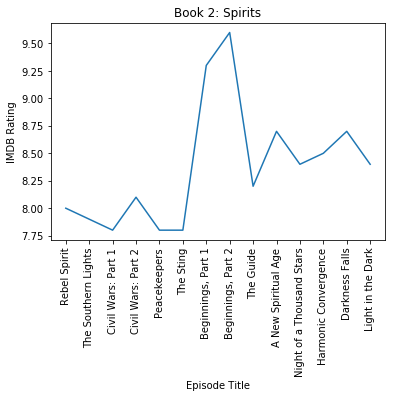

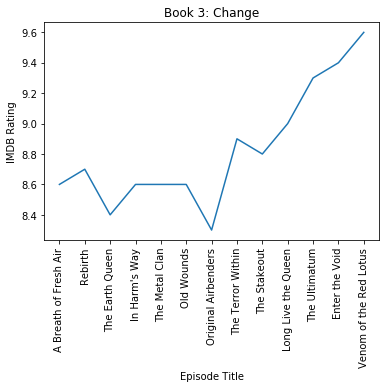

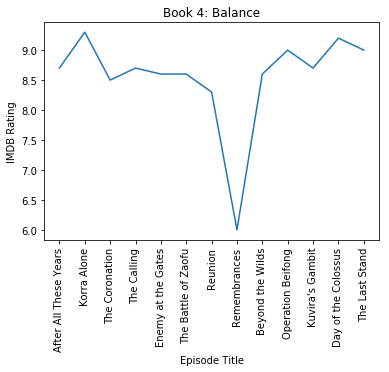

In [187]:
allSeasonsRating()